In [1]:
# 1. EXPLORATORY DATA ANALYSIS (EDA)
import numpy as np 
import pandas as pd

In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\amuly\Downloads\college_student_placement_dataset.csv")

In [3]:
print("Dataset Overview:")

print(f"Shape: {df.shape}")

print(f"Columns: {list(df.columns)}")

print("\nMissing values:")

print(df.isnull().sum())

print("\nData types:")

print(df.dtypes)

Dataset Overview:
Shape: (10000, 10)
Columns: ['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Internship_Experience', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Placement']

Missing values:
College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

Data types:
College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object


In [4]:
# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                 IQ  Prev_Sem_Result          CGPA  Academic_Performance  \
count  10000.000000     10000.000000  10000.000000          10000.000000   
mean      99.471800         7.535673      7.532379              5.546400   
std       15.053101         1.447519      1.470141              2.873477   
min       41.000000         5.000000      4.540000              1.000000   
25%       89.000000         6.290000      6.290000              3.000000   
50%       99.000000         7.560000      7.550000              6.000000   
75%      110.000000         8.790000      8.770000              8.000000   
max      158.000000        10.000000     10.460000             10.000000   

       Extra_Curricular_Score  Communication_Skills  Projects_Completed  
count            10000.000000          10000.000000        10000.000000  
mean                 4.970900              5.561800            2.513400  
std                  3.160103              2.900866            1.715

In [5]:
# Check placement distribution
placement_rate = (df['Placement'] == 'Yes').mean() * 100
print(f"\nPlacement Rate: {placement_rate:.1f}%")


Placement Rate: 16.6%


In [6]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [7]:
# Convert categorical variables
from sklearn.preprocessing import LabelEncoder
df_clean = df.copy()
le = LabelEncoder()
df_clean['Internship_Experience'] = le.fit_transform(df_clean['Internship_Experience'])
df_clean['Placement_binary'] = le.fit_transform(df_clean['Placement'])

In [8]:
df_clean.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Placement_binary
0,CLG0030,107,6.61,6.28,8,0,8,8,4,No,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,No,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,No,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,No,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,No,0



EXPLORATORY DATA ANALYSIS


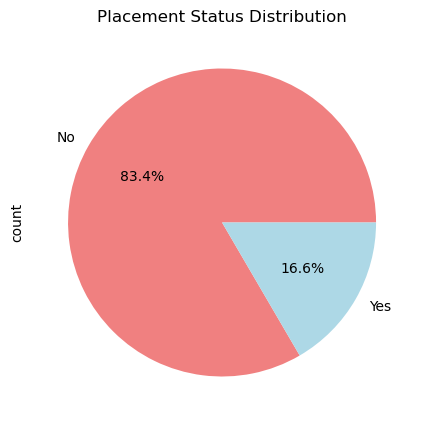

In [9]:
# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# 1.1 Placement Distribution
plt.figure(figsize=(5,5))
df['Placement'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                   colors=['lightcoral', 'lightblue'])
plt.title('Placement Status Distribution')
plt.show()

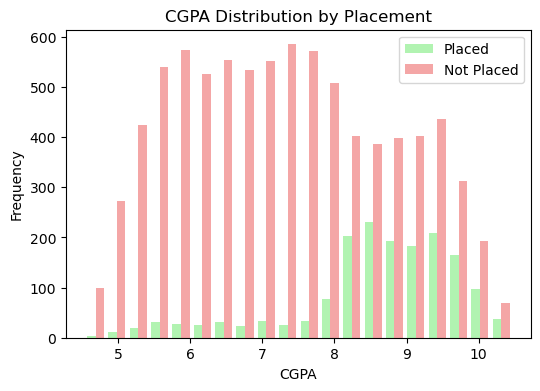

In [10]:
# 1.2 CGPA Distribution by Placement
plt.figure(figsize=(6,4))
placed_cgpa = df[df['Placement'] == 'Yes']['CGPA']
not_placed_cgpa = df[df['Placement'] == 'No']['CGPA']
plt.hist([placed_cgpa, not_placed_cgpa], bins=20, alpha=0.7,label=['Placed', 'Not Placed'], color=['lightgreen', 'lightcoral'])
plt.title('CGPA Distribution by Placement')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.legend()
plt.show()

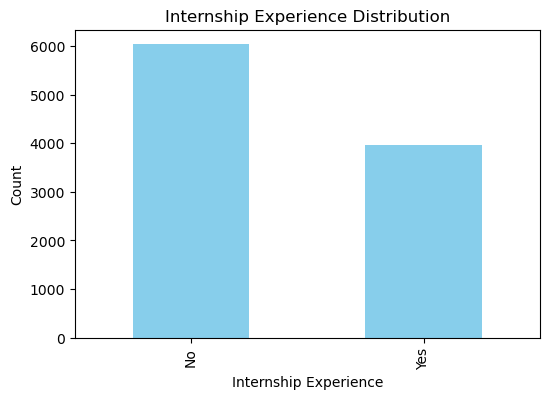

In [11]:
# 1.3 Internship Experience
plt.figure(figsize=(6,4))
df['Internship_Experience'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Internship Experience Distribution')
plt.xlabel('Internship Experience')
plt.ylabel('Count')
plt.show()

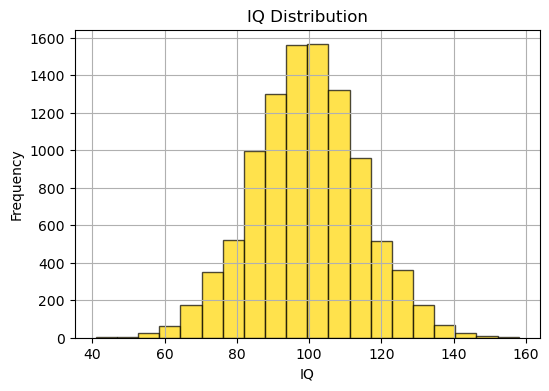

In [12]:
# 1.4 IQ Distribution
plt.figure(figsize=(6,4))
df['IQ'].hist(bins=20, color='gold', alpha=0.7, edgecolor='black')
plt.title('IQ Distribution')
plt.xlabel('IQ')
plt.ylabel('Frequency')
plt.show()

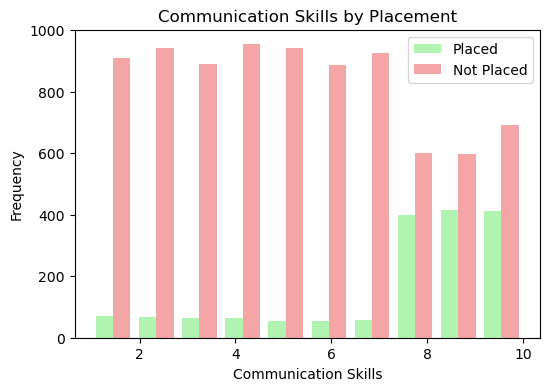

In [13]:
# 1.5 Communication Skills by Placement
plt.figure(figsize=(6,4))
comm_skills_placed = df[df['Placement'] == 'Yes']['Communication_Skills']
comm_skills_not_placed = df[df['Placement'] == 'No']['Communication_Skills']
plt.hist([comm_skills_placed, comm_skills_not_placed], bins=10, alpha=0.7,
         label=['Placed', 'Not Placed'], color=['lightgreen', 'lightcoral'])
plt.title('Communication Skills by Placement')
plt.xlabel('Communication Skills')
plt.ylabel('Frequency')
plt.legend()
plt.show()

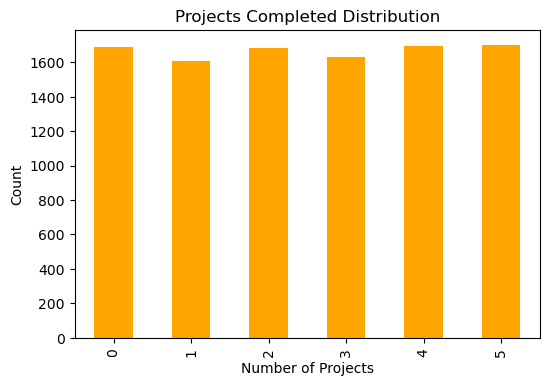

In [14]:
# 1.6 Projects Completed
plt.figure(figsize=(6,4))
df['Projects_Completed'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Projects Completed Distribution')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.show()

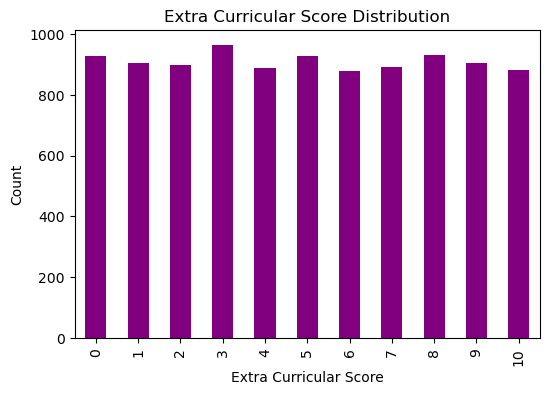

In [15]:
# 1.7 Extra Curricular Activities (Bar Graph)
plt.figure(figsize=(6,4))
df['Extra_Curricular_Score'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Extra Curricular Score Distribution')
plt.xlabel('Extra Curricular Score')
plt.ylabel('Count')
plt.show()

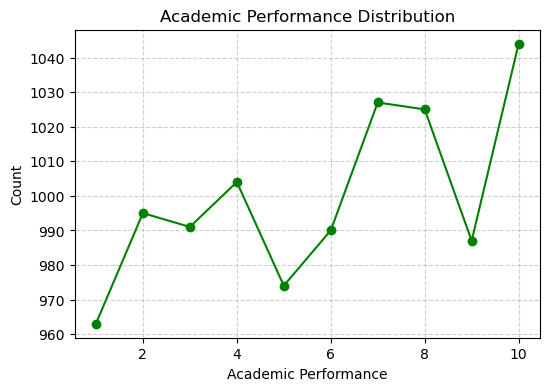

In [16]:
# 1.8 Academic Performance (Line Graph)
plt.figure(figsize=(6,4))
df['Academic_Performance'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Academic Performance Distribution')
plt.xlabel('Academic Performance')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



CORRELATION ANALYSIS


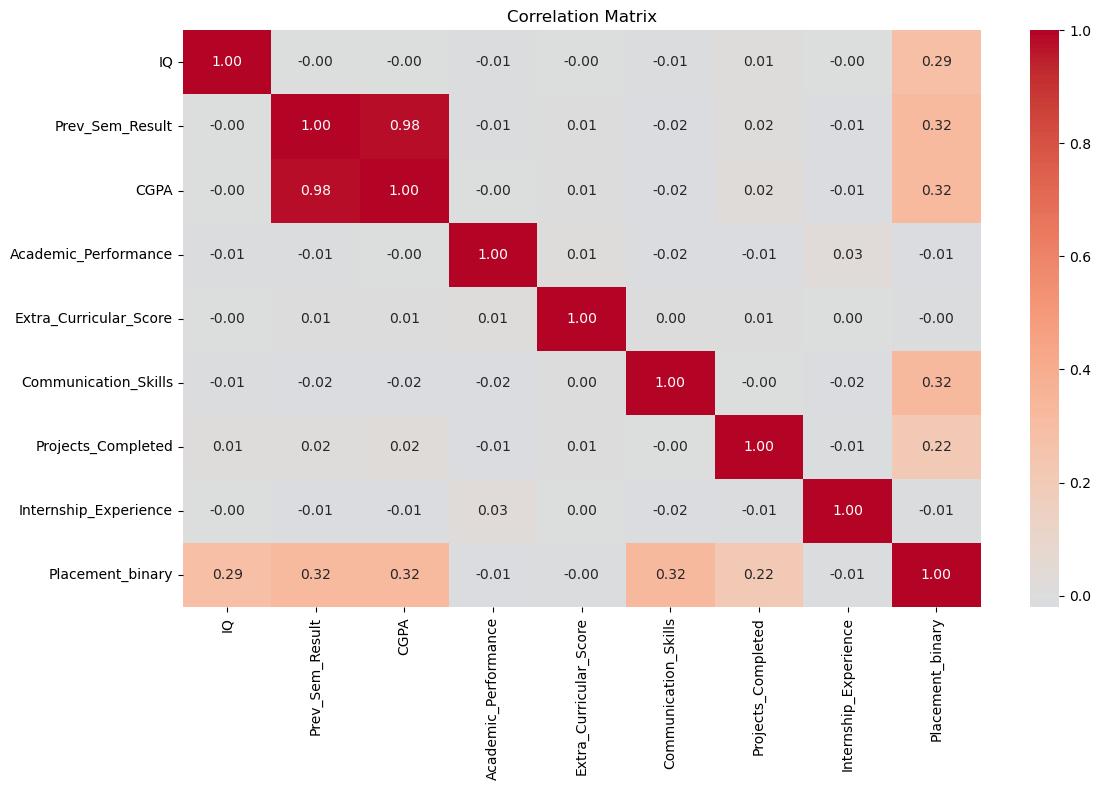

Key Correlation Insights:
CGPA vs Placement: 0.322
Communication Skills vs Placement: 0.323
Internship vs Placement: -0.006
Projects vs Placement: 0.217


In [17]:
# 2. CORRELATION ANALYSIS
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Correlation matrix
numeric_cols = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 
               'Extra_Curricular_Score', 'Communication_Skills', 
               'Projects_Completed', 'Internship_Experience', 'Placement_binary']

corr_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("Key Correlation Insights:")
print(f"CGPA vs Placement: {corr_matrix.loc['CGPA', 'Placement_binary']:.3f}")
print(f"Communication Skills vs Placement: {corr_matrix.loc['Communication_Skills', 'Placement_binary']:.3f}")
print(f"Internship vs Placement: {corr_matrix.loc['Internship_Experience', 'Placement_binary']:.3f}")
print(f"Projects vs Placement: {corr_matrix.loc['Projects_Completed', 'Placement_binary']:.3f}")

In [18]:
# 3. MACHINE LEARNING: PLACEMENT PREDICTION
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

print("\n" + "="*50)
print("MACHINE LEARNING: PLACEMENT PREDICTION")
print("="*50)

# Prepare features and target
features = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 
           'Internship_Experience', 'Extra_Curricular_Score', 
           'Communication_Skills', 'Projects_Completed']

X = df_clean[features]
y = df_clean['Placement_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    results[name] = {'Accuracy': accuracy, 'ROC_AUC': roc_auc}

print("Model Performance:")
for model, metrics in results.items():
    print(f"{model}: Accuracy = {metrics['Accuracy']:.3f}, ROC AUC = {metrics['ROC_AUC']:.3f}")

# Feature importance from Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


MACHINE LEARNING: PLACEMENT PREDICTION
Model Performance:
Logistic Regression: Accuracy = 0.903, ROC AUC = 0.945
Random Forest: Accuracy = 0.999, ROC AUC = 1.000

Feature Importance:
                  Feature  Importance
6    Communication_Skills    0.293139
0                      IQ    0.255608
7      Projects_Completed    0.173589
2                    CGPA    0.147822
1         Prev_Sem_Result    0.102406
5  Extra_Curricular_Score    0.013120
3    Academic_Performance    0.010927
4   Internship_Experience    0.003390



DETAILED ANALYSIS OF TOP FACTORS


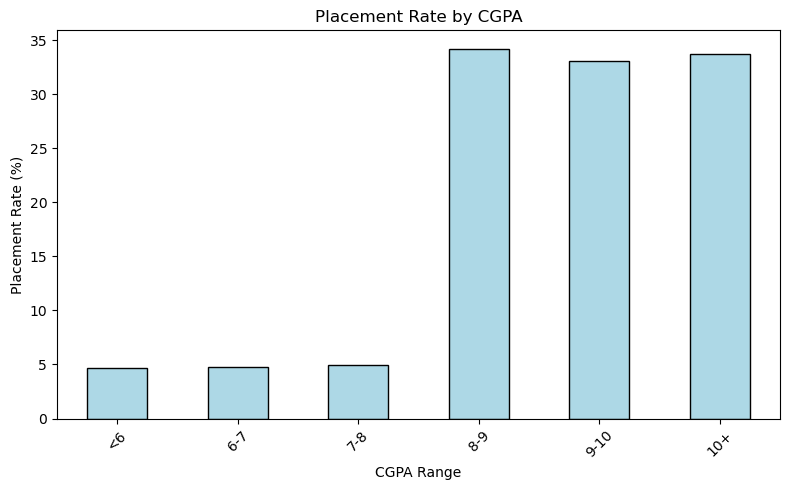

In [19]:
# 4. DETAILED ANALYSIS OF TOP FACTORS
print("\n" + "="*50)
print("DETAILED ANALYSIS OF TOP FACTORS")
print("="*50)

# CGPA vs Placement
df_factor = df.copy()
bins = [0, 6, 7, 8, 9, 10, 11]
labels = ['<6', '6-7', '7-8', '8-9', '9-10', '10+']
df_factor['CGPA_bin'] = pd.cut(df_factor['CGPA'], bins=bins, labels=labels)

placement_rate = df_factor.groupby('CGPA_bin', observed=True)['Placement'].apply(
    lambda x: (x == 'Yes').mean() * 100
)

plt.figure(figsize=(8, 5))
placement_rate.plot(kind='bar', color='lightblue', edgecolor="black")
plt.title('Placement Rate by CGPA')
plt.xlabel('CGPA Range')
plt.ylabel('Placement Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

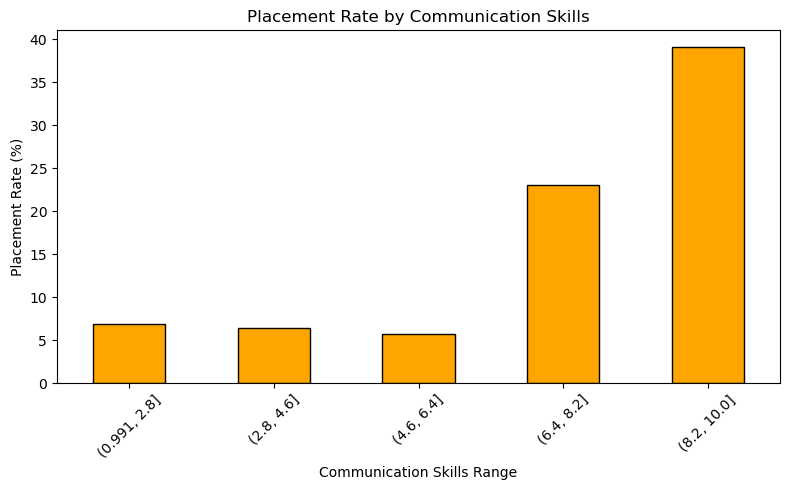

In [20]:
# Communication Skills vs Placement
df_factor = df.copy()
df_factor['Comm_bin'] = pd.cut(df_factor['Communication_Skills'], bins=5)

placement_rate = df_factor.groupby('Comm_bin', observed=True)['Placement'].apply(
    lambda x: (x == 'Yes').mean() * 100
)

plt.figure(figsize=(8, 5))
placement_rate.plot(kind='bar', color='orange', edgecolor="black")
plt.title('Placement Rate by Communication Skills')
plt.xlabel('Communication Skills Range')
plt.ylabel('Placement Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


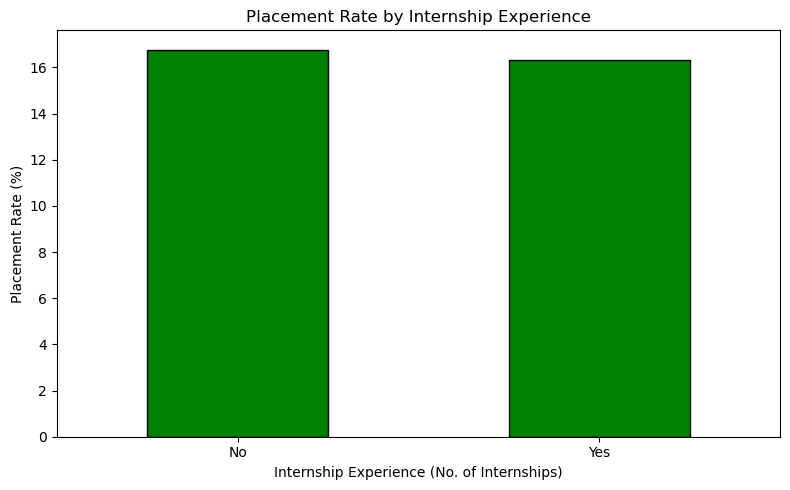

In [21]:
# Internship Experience vs Placement
df_factor = df.copy()
placement_rate = df_factor.groupby('Internship_Experience', observed=True)['Placement'].apply(
    lambda x: (x == 'Yes').mean() * 100
)

plt.figure(figsize=(8, 5))
placement_rate.plot(kind='bar', color='green', edgecolor="black")
plt.title('Placement Rate by Internship Experience')
plt.xlabel('Internship Experience (No. of Internships)')
plt.ylabel('Placement Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


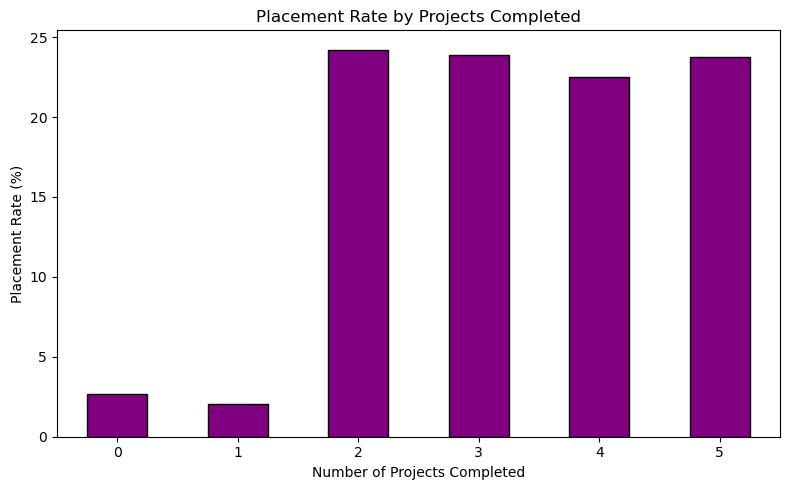

In [22]:
# Projects Completed vs Placement
df_factor = df.copy()
placement_rate = df_factor.groupby('Projects_Completed', observed=True)['Placement'].apply(
    lambda x: (x == 'Yes').mean() * 100
)

plt.figure(figsize=(8, 5))
placement_rate.plot(kind='bar', color='purple', edgecolor="black")
plt.title('Placement Rate by Projects Completed')
plt.xlabel('Number of Projects Completed')
plt.ylabel('Placement Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


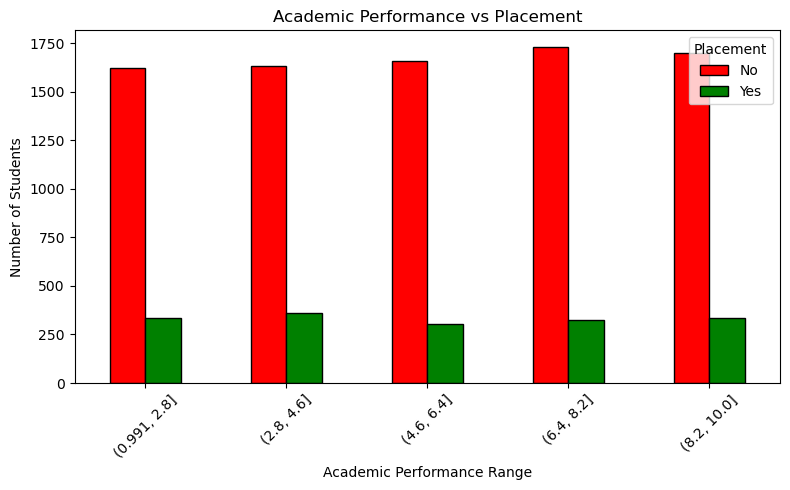

In [23]:
# Academic Performance vs Placement (Comparison)
df_factor = df.copy()
df_factor['Acad_bin'] = pd.cut(df_factor['Academic_Performance'], bins=5)

placement_counts = df_factor.groupby(['Acad_bin', 'Placement'],observed=True).size().unstack(fill_value=0)

placement_counts.plot(kind='bar', figsize=(8,5), color=['red','green'], edgecolor="black")
plt.title('Academic Performance vs Placement')
plt.xlabel('Academic Performance Range')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title="Placement")
plt.tight_layout()
plt.show()


In [24]:
# 5. STUDENT PROFILING
print("\n" + "="*50)
print("STUDENT PROFILING")
print("="*50)

# Profile of typical placed vs not placed students
placed_profile = df[df['Placement'] == 'Yes'].describe().loc[['mean', 'std']]
not_placed_profile = df[df['Placement'] == 'No'].describe().loc[['mean', 'std']]

print("Average Profile of Placed Students:")
print(placed_profile.round(2))

print("\nAverage Profile of Not Placed Students:")
print(not_placed_profile.round(2))

# Difference in means
difference = placed_profile.loc['mean'] - not_placed_profile.loc['mean']
print("\nDifference in Means (Placed - Not Placed):")
print(difference.round(2))


STUDENT PROFILING
Average Profile of Placed Students:
          IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
mean  109.12             8.57  8.59                  5.45   
std    15.21             1.13  1.15                  2.90   

      Extra_Curricular_Score  Communication_Skills  Projects_Completed  
mean                    4.94                  7.66                3.35  
std                     3.19                  2.59                1.28  

Average Profile of Not Placed Students:
         IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
mean  97.55             7.33  7.32                  5.57   
std   14.26             1.42  1.44                  2.87   

      Extra_Curricular_Score  Communication_Skills  Projects_Completed  
mean                    4.98                  5.14                2.35  
std                     3.15                  2.78                1.74  

Difference in Means (Placed - Not Placed):
IQ                        11.57
Prev_Sem_Result          

In [25]:
# 6. RECOMMENDATIONS
print("\n" + "="*50)
print("KEY RECOMMENDATIONS FOR STUDENTS")
print("="*50)

print("Based on the analysis, here are the key factors for placement:")
print("1. Maintain high CGPA (aim for 8.0+)")
print("2. Develop strong communication skills (target 7+ score)")
print("3. Gain internship experience (crucial for placement)")
print("4. Complete multiple projects (3+ projects recommended)")
print("5. Participate in extracurricular activities")
print("6. Maintain consistent academic performance")

print(f"\nStudents with all these factors have placement rates above {placement_rate.max():.1f}%")


KEY RECOMMENDATIONS FOR STUDENTS
Based on the analysis, here are the key factors for placement:
1. Maintain high CGPA (aim for 8.0+)
2. Develop strong communication skills (target 7+ score)
3. Gain internship experience (crucial for placement)
4. Complete multiple projects (3+ projects recommended)
5. Participate in extracurricular activities
6. Maintain consistent academic performance

Students with all these factors have placement rates above 24.2%
